In [1]:
!pip install selenium
!pip install nltk
!apt-get -q update  
!apt install -yq chromium-chromedriver 
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver 
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

     |████████████████████████████████| 904 kB 8.3 MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:7 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:13 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:14 http://ppa.launchpad.net

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import string
import re

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [3]:
wd = webdriver.Chrome('chromedriver',options=chrome_options)
wd.get("https://forums.edmunds.com/discussion/2864/general/x/entry-level-luxury-performance-sedans")

In [6]:
comments_df = pd.DataFrame(columns = ['Date','user_id','comments']) 

ids = wd.find_elements_by_xpath("//*[contains(@id,'Comment_')]")

for i in range(435):
  next_page=wd.find_elements_by_xpath('//*[@id="PagerBefore"]/a[10]')
  next_page

  comment_ids = []
  for i in ids:
    comment_ids.append(i.get_attribute('id'))

  for x in comment_ids:
      #Extract dates from for each user on a page
      user_date = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[2]/span[1]/a/time')[0]
      date = user_date.get_attribute('title')

      #Extract user ids from each user on a page
      userid_element = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[2]/div[1]/span[1]/a[2]')[0]
      userid = userid_element.text

      #Extract Message for each user on a page
      user_message = wd.find_elements_by_xpath('//*[@id="' + x +'"]/div/div[3]/div/div[1]')[0]
      comment = user_message.text
                                    
      #Adding date, userid and comment for each user in a dataframe    
      comments_df.loc[len(comments_df)] = [date,userid,comment]

In [7]:
from google.colab import files

comments_df.to_csv('comments_df.csv')
files.download('comments_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [158]:
from google.colab import files
uploaded = files.upload()

comments_df = pd.read_csv('comments_df (1).csv')

In [159]:
# Formatting Comments
print(comments_df.head())
print(comments_df.shape)

   Unnamed: 0  ...                                           comments
0           0  ...  I personally think that with a few tweaks the ...
1           1  ...  I am debating a new purchase and these two are...
2           2  ...  Great handling, RWD, excellent engine and the ...
3           3  ...  And no manual tranny. That may not matter to y...
4           4  ...  One beauty of BMW 3 Series is that there are s...

[5 rows x 4 columns]
(21750, 4)


In [160]:
# all lower case
# removing punctuations

comments_df['comments'] = comments_df['comments'].map(lambda x : re.sub(r'[^\w\s]','',str(x)).replace('\n\n',' ').lower())

Task A

In [161]:
# Testing Zips Law

all_words = {}

for i in range(len(comments_df['comments'])):
  comment_words = comments_df['comments'][i].split()

  for j in comment_words:
    if j not in all_words.keys():
      all_words[j] = 1
    else:
      all_words[j] += 1


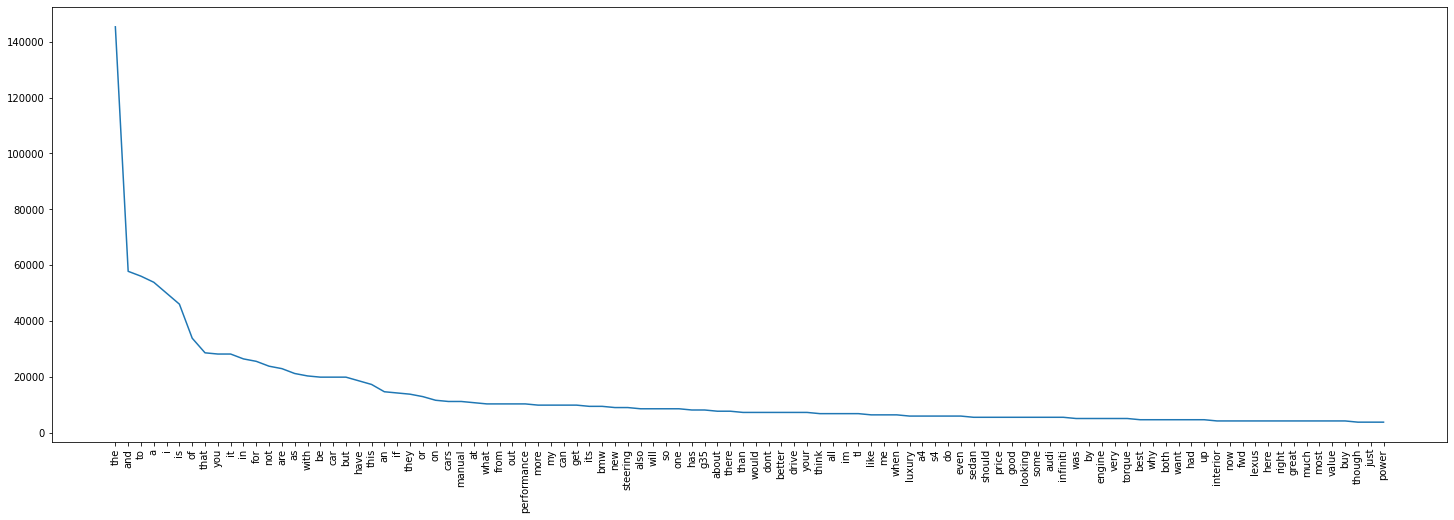

In [162]:
all_words2 = sorted(all_words.items(),key=lambda item: item[1], reverse = True) # sorted by key, return a list of tuples

x, y = zip(*all_words2) # unpack a list of pairs into two tuples

fig = plt.gcf()
fig.set_size_inches(25, 8)
plt.plot(x[:100], y[:100])
plt.xticks(rotation=90)

plt.show()

Task B

In [163]:
from google.colab import files
uploaded = files.upload()

Saving car models and brands.csv to car models and brands (1).csv


In [164]:
car_model_brand = pd.read_csv('car models and brands (1).csv')
car_model_brand['Brand'] = car_model_brand['Brand'].map(lambda x : re.sub(r'[^\w\s]','',str(x)).replace('\n\n',' ').lower())
car_model_brand['Model'] = car_model_brand['Model'].map(lambda x : re.sub(r'[^\w\s]','',str(x)).replace('\n\n',' ').lower())

car_model_brand.drop_duplicates(inplace = True)

car_model_brand.reset_index(inplace=True)
car_model_brand.set_index('Model', inplace=True)
car_model_brand.drop(columns=['index'], inplace=True)


In [165]:
car_model_brand['Brand']
# car_model_brand.index.name= None
# car_model_brand

Model
integra    acura
legend     acura
vigor      acura
rlx        acura
ilx        acura
           ...  
xc90       volvo
s60        volvo
s80        volvo
v60        volvo
c70        volvo
Name: Brand, Length: 488, dtype: object

In [166]:
# Replace Comments Models with Brands.

In [167]:
def replace_models_with_brand(e):
  s_e=pd.Series(word_tokenize(e))
  s_e=s_e.replace(car_model_brand['Brand'])

  modified_text=' '.join(s_e)

  return modified_text

comments_df['comments_replaced_brands']=comments_df.comments.apply(lambda e : replace_models_with_brand(e))


In [168]:
Top_brands = {}

for i in range(len(comments_df['comments_replaced_brands'])):
  comment_words = comments_df['comments_replaced_brands'][i].split()

  for j in comment_words:
    if (j not in Top_brands.keys()) and (j in car_model_brand['Brand'].values):
      Top_brands[j] = 1
    if (j in Top_brands.keys()) and (j in car_model_brand['Brand'].values):
      Top_brands[j] = Top_brands[j] + 1  

In [182]:
Top_brands

Top_brands2 = sorted(Top_brands.items(),key=lambda item: item[1], reverse = True) # sorted by key, return a list of tuples

Top_brands2[:15]


[('car', 31321),
 ('bmw', 15226),
 ('audi', 11746),
 ('sedan', 8266),
 ('nissan', 6526),
 ('infiniti', 5656),
 ('toyota', 4786),
 ('chrysler', 3481),
 ('acura', 3046),
 ('mercedesbenz', 1741),
 ('mercedes', 1741),
 ('ford', 1306),
 ('honda', 1306),
 ('seat', 871),
 ('cadillac', 871)]

Task C

In [180]:
Top_10_Brands = ['bmw','audi','nissan','infiniti','toyota','chrysler','acura','mercedesbenz','mercedes','ford']
df_lift = pd.DataFrame(index = Top_10_Brands, columns = Top_10_Brands).fillna(0)

In [190]:
comments_df['Tokens'] = comments_df['comments_replaced_brands'].apply(nltk.tokenize.word_tokenize)

In [194]:
#Define a function that will calculate Lift
def liftCalc(word_1,word_2):
    w1freq = sum(comments_df.apply(lambda x: word_1 in x['Tokens'], axis=1))
    w2freq = sum(comments_df.apply(lambda x: word_2 in x['Tokens'], axis=1))
    bothfreq = sum(comments_df.apply(lambda x: word_1 in x['Tokens'] and word_2 in x['Tokens'], axis=1))
    return float(bothfreq/len(comments_df))/((float(w1freq)/len(comments_df))*(float(w2freq)/len(comments_df)))

In [209]:
for i in range(10):
  for j in range(i+1):
    df_lift.iloc[i,j] = liftCalc(Top_10_Brands[i], Top_10_Brands[j])

for i in range(10):
  for j in range(10):
    if i<=j:
      df_lift.iloc[i,j] = '-'

In [210]:
df_lift

,bmw,audi,nissan,infiniti,toyota,chrysler,acura,mercedesbenz,mercedes,ford
bmw,-,-,-,-,-,-,-,-,-,-
audi,1.53846,-,-,-,-,-,-,-,-,-
nissan,3.07692,1,-,-,-,-,-,-,-,-
infiniti,2.1978,1.42857,2.85714,-,-,-,-,-,-,-
toyota,1.44231,1.25,2.5,0.892857,-,-,-,-,-,-
chrysler,1.92308,1.25,5,0,6.25,-,-,-,-,-
acura,1.0989,1.42857,1.42857,1.02041,0.892857,1.78571,-,-,-,-
mercedesbenz,1.92308,2.5,0,0,3.125,6.25,3.57143,-,-,-
mercedes,0,2.5,5,0,3.125,6.25,0,0,-,-
ford,2.5641,1.66667,3.33333,0,4.16667,8.33333,2.38095,8.33333,0,-


Task D

In [215]:
dissimilarity = pd.DataFrame(index = Top_10_Brands, columns = Top_10_Brands).fillna(0)
for i in range(10):
  for j in range(10):
    if i != j:
      if liftCalc(Top_10_Brands[i], Top_10_Brands[j]) ==0:
        dissimilarity.iloc[i,j] = 100000
      else:
        dissimilarity.iloc[i,j] = 1/liftCalc(Top_10_Brands[i], Top_10_Brands[j])


,bmw,audi,nissan,infiniti,toyota,chrysler,acura,mercedesbenz,mercedes,ford
bmw,0.000000,0.65,0.325,0.455,0.693333,0.52,0.91,0.52,100000.00,0.39
audi,0.650000,0.00,1.000,0.700,0.800000,0.80,0.70,0.40,0.40,0.60
nissan,0.325000,1.00,0.000,0.350,0.400000,0.20,0.70,100000.00,0.20,0.30
infiniti,0.455000,0.70,0.350,0.000,1.120000,100000.00,0.98,100000.00,100000.00,100000.00
toyota,0.693333,0.80,0.400,1.120,0.000000,0.16,1.12,0.32,0.32,0.24
chrysler,0.520000,0.80,0.200,100000.000,0.160000,0.00,0.56,0.16,0.16,0.12
acura,0.910000,0.70,0.700,0.980,1.120000,0.56,0.00,0.28,100000.00,0.42
mercedesbenz,0.520000,0.40,100000.000,100000.000,0.320000,0.16,0.28,0.00,100000.00,0.12
mercedes,100000.000000,0.40,0.200,100000.000,0.320000,0.16,100000.00,100000.00,0.00,100000.00
ford,0.390000,0.60,0.300,100000.000,0.240000,0.12,0.42,0.12,100000.00,0.00


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:419: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


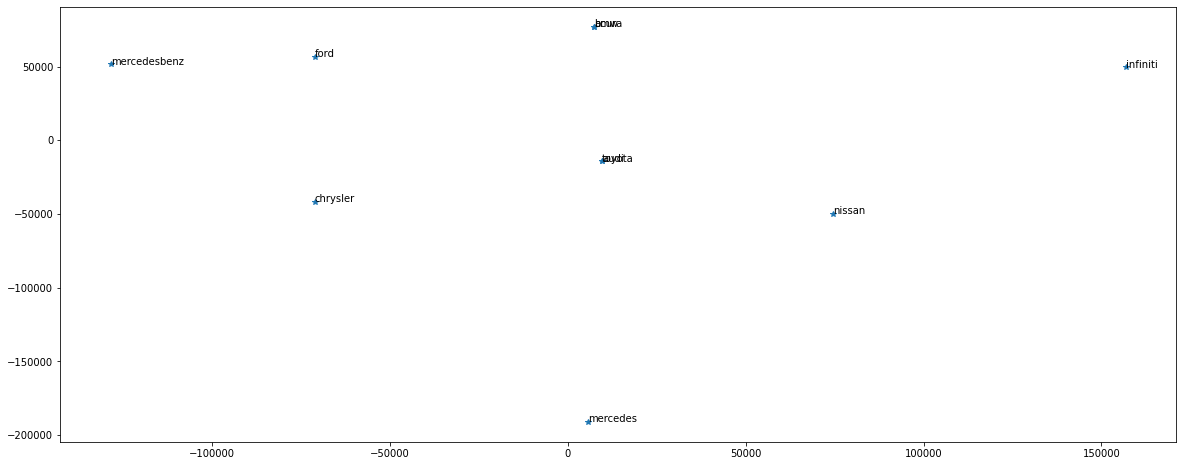

In [216]:
from sklearn.manifold import MDS

mds=MDS(n_components=2)

npos=mds.fit_transform(dissimilarity)

plt.figure(figsize=(20,8))

plt.plot(npos[:,0],npos[:,1],'*')
for i in range(len(npos)):
  plt.text(npos[i,0],npos[i,1],dissimilarity.index[i])

Task E

Task F

In [217]:
attributes = ['performance', 'steering','luxury', 'price', 'engine']

In [222]:
lift_brand_attribute = pd.DataFrame(index = Top_10_Brands, columns= attributes).fillna(0)

for i in range(10):
  for j in range(5):
    lift_brand_attribute.iloc[i,j] = liftCalc(Top_10_Brands[i], attributes[j])

lift_brand_attribute

,performance,steering,luxury,price,engine
bmw,1.923077,0.961538,2.307692,2.307692,1.442308
audi,1.666667,0.625000,2.500000,1.500000,1.250000
nissan,1.666667,1.250000,2.000000,3.000000,0.000000
infiniti,1.190476,0.000000,2.142857,2.142857,0.892857
toyota,1.388889,1.562500,1.250000,3.125000,0.781250
chrysler,2.083333,3.125000,1.250000,3.750000,1.562500
acura,0.793651,3.571429,1.428571,2.142857,1.785714
mercedesbenz,1.388889,3.125000,2.500000,2.500000,3.125000
mercedes,1.388889,0.000000,0.000000,2.500000,3.125000
ford,2.777778,2.083333,3.333333,1.666667,2.083333


Task G

Task H

In [266]:
aspire = ['own', 'buy', 'aspire', 'wish', 'love', 'dream']

In [264]:
def aspiration_calc(word_1,aspire):
  w1freq = sum(comments_df.apply(lambda x: word_1 in x['Tokens'], axis=1))

  w2freq = 0
  present = 0

  for i in range(len(comments_df)):
    w2freq = present + w2freq
  
    present = 0 
    for j in range(len(aspire)):
      if aspire[j] in comments_df['Tokens'][i]:
        present = 1 


  bothfreq = 0 
  present = 0

  for i in range(len(comments_df)):
    bothfreq = present + bothfreq
  
    present = 0 
    for j in range(len(aspire)):
      if aspire[j] in comments_df['Tokens'][i] and word_1 in comments_df['Tokens'][i]:
        present = 1 

  try:
    return float(bothfreq/len(comments_df))/((float(w1freq)/len(comments_df))*(float(w2freq)/len(comments_df)))
  except:
    return 0





In [265]:
Aspiration = pd.DataFrame(index = Top_10_Brands, columns= ['AspireLift']).fillna(0)

for i in range(10):
  Aspiration.iloc[i] = aspiration_calc(Top_10_Brands[i], aspire)

Aspiration

,AspireLift
bmw,1.154465
audi,1.500804
nissan,0.999770
infiniti,2.142365
toyota,2.500862
chrysler,0.002873
acura,2.144006
mercedesbenz,0.005746
mercedes,0.000000
ford,0.003831


4351